In [3]:
import csv
from plotnine import *
from glob import glob
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Outlier Cleanup with the z score method
adapted from https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/ and https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 

In [100]:
##Outlier Cleanup

def zcleaner(fname):
    cellAreapd=pd.DataFrame()
    cA1=pd.read_csv(fname,skiprows=3)
    cA1['z_sc1']=stats.zscore(cA1['Cell Area'])
    cA1_o1=cA1.loc[cA1['z_sc1'].abs()<3]
    cA1_o1['z_sc2']=stats.zscore(cA1_o1['Cell Area'])
    cA1_o2=cA1_o1.loc[cA1_o1['z_sc2'].abs()<3]
    return(cA1_o2)


In [196]:
## reading files in the dir to make granddaddy PD
k8dir='/home/snaik/Desktop/Temp_cellsarea/CellArea/'
k8Files=glob(k8dir+'Cell_Area*.csv')
cCADataframe=pd.DataFrame()
for filename in k8Files:
    tempDataframe=pd.DataFrame()
    tempDataframe['Cell Area']=zcleaner(filename)['Cell Area']
    tempDataframe['Time']=zcleaner(filename)['Time']
    tempDataframe['pos']=len(zcleaner(filename)['Time'])*[filename[-5:-4]]
    tempDataframe['cond']=len(zcleaner(filename)['Time'])*['K8']
    cCADataframe=cCADataframe.append(tempDataframe, ignore_index=True)
    
cntdir='/home/snaik/Desktop/Temp_cellsarea/Control/Cnt_Cell_Area/'
cntFiles=glob(cntdir+"*.csv")
for filename in cntFiles:
    tempDataframe=pd.DataFrame()
    tempDataframe['Cell Area']=zcleaner(filename)['Cell Area']
    tempDataframe['Time']=zcleaner(filename)['Time']
    tempDataframe['pos']=len(zcleaner(filename)['Time'])*[filename[-5:-4]]
    tempDataframe['cond']=len(zcleaner(filename)['Time'])*['cnt']
    cCADataframe=cCADataframe.append(tempDataframe)
# cCADataframe['Time']=cCADataframe['Time']*0.24

/home/snaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/snaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/snaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

/home/snaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/snaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/snaik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

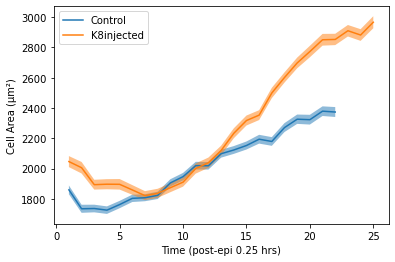

In [202]:
#Line plotting with ribbons! and also mega complex plotting
C=cCADataframe.loc[cCADataframe['cond']=='cnt'].groupby(['Time'])
K=cCADataframe.loc[cCADataframe['cond']=='K8'].groupby(['Time'])
plt.figure()
plt.plot(cCADataframe.loc[cCADataframe['cond']=='cnt'].groupby(['Time']).mean())

plt.fill_between(list(dict.fromkeys(cCADataframe.loc[cCADataframe['cond']=='cnt']['Time'])),C.mean()['Cell Area']+C.sem()["Cell Area"],C.mean()['Cell Area']-C.sem()["Cell Area"],alpha=0.5)
plt.plot(K.mean()[:25])
plt.fill_between(list(dict.fromkeys(cCADataframe.loc[cCADataframe['cond']=='K8']['Time']))[:25],K.mean()['Cell Area'][:25]+K.sem()['Cell Area'][:25],K.mean()['Cell Area'][:25]-K.sem()['Cell Area'][:25],alpha=0.5)
plt.legend(['Control',"K8injected"])
plt.xlabel("Time (post-epi 0.25 hrs)")
plt.ylabel("Cell Area (µm²)")
plt.savefig(k8dir+"/Cellarea.png")

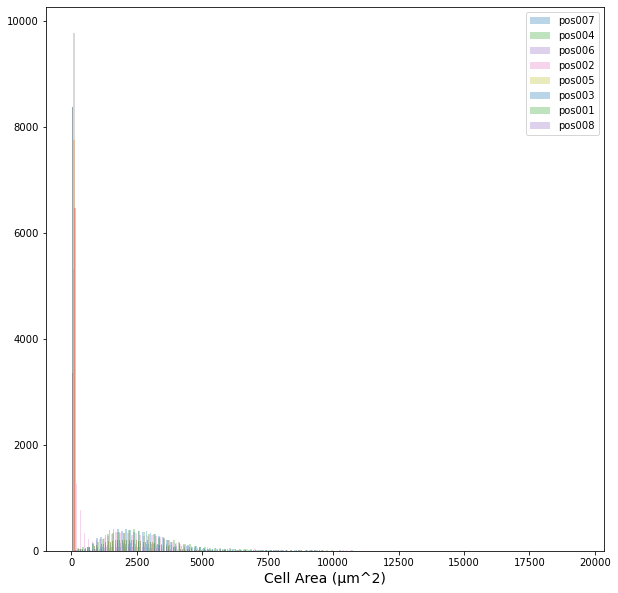

In [79]:
## Hist plotting to see individual postion data
plt.figure(figsize=(10,10))
plt.xlabel("Cell Area (μm^2)",size=14)

for col in cellArea_clean.keys():
    plt.hist(cellArea_clean[col],bins=100,alpha=0.3,label="pos00"+col)
    
plt.legend()


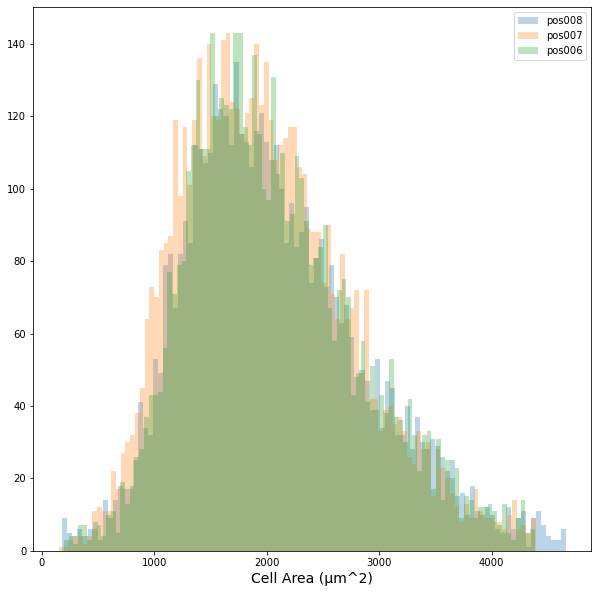

In [57]:
plt.figure(figsize=(10,10))
plt.xlabel("Cell Area (μm^2)",size=14)

for col in cntArea_clean.keys():
    plt.hist(cntArea_clean[col],bins=100,alpha=0.3,label="pos00"+col)
    
plt.legend()